# Numerical features:

+ amount_tsh: the amount of water: it contains 0s as invaild values. nonlinear transformation does not help to remove the 0 values
+ gps_height: the values look ok no invaild values (it not possible to tell if the 0s are invaild values)
+ longitude: there are some 0 values as invalid values and they should be replaced
+ latitude: No sign of invalid values
+ population: there are some zeros as invalid values

# Categorical features:

+ region_code: there are some outliers with log transformation the problem can be solved
+ district_code: there are some outliers but the log transform it can solved
+ funder: 3635 missing values, a lot of categories
+ installer: 3655 missing values, a lot of categories
+ wpt_name: a lot of categories there are some None values
+ payment: limited categories no sign for missing values
+ payment_type: limited categories no sign for missing values (there are some 0s)
+ water_quality:limited categories no sign for missing values (there are some 0s)
+ quality_group:limited categories no sign for missing values (there are some 0s)
+ source:limited categories no sign for missing values (there are some 0s)
+ source_type:limited categories no sign for missing values (there are some 0s) (high correlated with soruce)
+ source_class: alot of 0s-->unknown
+ waterpoint_type:limited categories no sign for missing values (there are some 0s)
+ waterpoint_type_group:limited categories no sign for missing values (there are some 0s)
+ basin:limited categories no sign for missing values
+ subvillage: 371 missing values, a lot of categories there are no sign of missing values
+ region: limited categories no sign for missing values
+ lga:a lot of categories there are no sign of missing values
+ ward:a lot of categories there are no sign of missing values
+ public_meeting: 3334 missing values:limited categories there are some signs for missing values (there are some 0s and -1)
+ recorded_by: one value no variation
+ scheme_management: 3877 missing values limited categories
+ scheme_name: 28166 missing values lot of categories
+ permit:3056 missing value two categories
+ extraction_type:limited categories no sign for missing values
+ extraction_type_group:limited categories no sign for missing values
+ extraction_type_class:limited categories no sign for missing values
+ management:limited categories no sign for missing values
+ management_group:limited categories no sign for missing values
+ quantity:limited categories no sign for missing values
+ quantity_group:limited categories no sign for missing values

# Labels:
There are three labels status_group that should be predicted:

+ functional
+ non functional
+ functional needs repair.

## Importing relevant libraries and packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from scipy.stats import skew
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

The data that is goingto be used in this project is from 2 datasets. One with all the feature information and another that contains the target or the value to be predicted

In [6]:
#imports the Tanzania water training data set

filepath = "data/tanzania_water_training.csv"
details_df = pd.read_csv(filepath)
pd.set_option('display.max_columns', None)
details_df.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,Lake Tanganyika,Kitonto,Rukwa,15,2,Sumbawanga Rural,Mkowe,150,True,GeoData Consultants Ltd,VWC,NaN,False,1991,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,Pangani,Maore Kati,Kilimanjaro,3,3,Same,Maore,210,True,GeoData Consultants Ltd,Water authority,Hingilili,True,1967,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,NaN,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,Wami / Ruvu,Komstari,Morogoro,5,6,Mvomero,Diongoya,89,True,GeoData Consultants Ltd,VWC,NaN,True,2007,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [7]:
details_df.shape

(59400, 40)

The data set contains 59400 records and 40 columns. That is alot and some of the columns will not make it to our analysis and modelling.

Below are the 40 column names and the datatypes of the column data

In [8]:
details_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [9]:
#importing the target data set

conditions_df = pd.read_csv("data/training_set_labels.csv")
conditions_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
conditions_df.shape

(59400, 2)

In [11]:
#merging the 2 data sets to form 1 big one

all_df = details_df.merge(conditions_df[["id", "status_group"]], on="id")
all_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


The combined data set has 59400 rows and 41 columns as seen in the cell below. The data types of the respective columns are also seen below

In [12]:
all_df.shape

(59400, 41)

In [13]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Data Cleaning and wrangling

Dealing with missing or NaN values

In [14]:
#outputs columns and thier missing value numbers in descending order
all_df.isna().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_c

In [15]:
#calculating the percentage missing of only the features with missing values
missing_data = all_df.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_df = pd.DataFrame({'missing number' :missing_data})
missing_df['missing percent'] = (missing_df['missing number'] / len(all_df)) * 100
missing_df


,missing number,missing percent
scheme_name,28810,48.501684
scheme_management,3878,6.528620
installer,3655,6.153199
funder,3637,6.122896
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579
wpt_name,2,0.003367


Text(0.5, 1.0, 'Graph of missing records in the dataset')

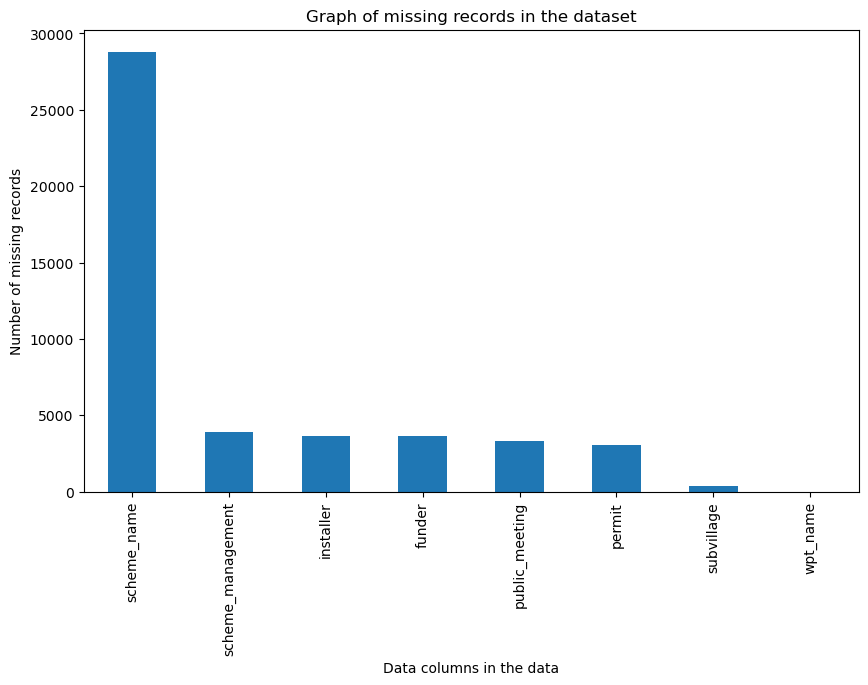

In [16]:
#plotting a histogram representing the information on the missing data
missing_data.plot(kind='bar', figsize=(10,6))
sns.color_palette(palette="Set2")
plt.ylabel("Number of missing records")
plt.xlabel("Data columns in the data")
plt.title("Graph of missing records in the dataset")

From the cells above we can see that the columns with the most missing values. They are represented with a bar chart showing the number of records missing in he columns. From the cells above we can see that the column `scheme_name` has the most at 28810 records an the rest being around 3000 missing records and finally the las which is `wpt_name` being at around 300. From this we can see that most of these columns store object or string data types

With 48.5% of the `scheme_name` data missing dropping this data column is the right decision. We could try replacing the missing values with a place holder word like "other" but considering that it stores names of the water pumping projects, there are very few reoccuring values in the data column hence this option is not feasible.



For the binary data columns `public_meeting` and `permit` they are going to be replaced by the most likely outcome

In [17]:
#dropping column scheme_name
all_df.drop(['scheme_name'], axis=1, inplace=True)
all_df.shape

(59400, 40)

For the other data features `scheme_management`, `installer`, `funder`, `subvillage`, `wpt_name` it is feasible to replace them with other

In [18]:
#replacing null values in these columns with "other"
missed = ["installer", "funder", "subvillage", "wpt_name", "scheme_management"]
for m in missed:
    all_df[m].fillna("other",inplace=True)

For the binary data columns `public_meeting` and `permit` they are going to be replaced according to a criteria.


In [19]:
#most likely outcome is True
all_df['public_meeting'].value_counts(dropna=False)

#filling null values with True
all_df['public_meeting'].fillna(True, inplace=True)

In the case of `public_meeting` above, the null values were replaced by True. This is mainly because we can say that a verbal meeting could have taken place and there might not have been a physical record. Hence we are going to use a bias that the meeting most likely happened.

For `permit` however, we are going to act with a bias of permit is a legal document and in this case a permit is more likely not to exist that it does exist. This is because a permit is issued by a governing institution and the government records do exist.

In [20]:
all_df['permit'].value_counts(dropna=False)

all_df['permit'].fillna(False, inplace=True)

In [21]:
#rechecking all the null values

all_df.isna().sum().sort_values(ascending=False)

id                       0
amount_tsh               0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
permit                   0
scheme_management        0
recorded_by              0
num_private              0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
public_meeting           0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
w

As you can see from above there are no more null values



### Dealing with 0s in numerical values

This section deals with replacing the 0s in some of the numeric data types in the columns with either the mean or the median values. The numeric data types in the dataset represent various different information. Some of which having a 0 as a value is a possibility. In this section thiugh we are going to focus on the data columns where having 0 as an input is not feasible. These data features include `construction_year` and `population`

Replacing 0s in the `population` data column with the mean of the whole column



In [22]:
#convering 0s to null
all_df['population'] = all_df['population'].replace(0, np.nan)


#replacing null values with the mean
population_avg = all_df['population'].mean(skipna=True)
all_df['population'].fillna(round(population_avg, 0), inplace=True)

count_pop = (all_df['population'] == 0).sum()
all_df['population'].head()

0    109.0
1    280.0
2    250.0
3     58.0
4    281.0
Name: population, dtype: float64

Replacing 0s in the `construction_year` data column with the mean of the whole column

In [23]:
#turning 0s to null values
all_df['construction_year'] = all_df['construction_year'].replace(0, np.nan)

#replacing null in the construction_year with the mean
year_avg = round(all_df['construction_year'].mean(skipna=True), 0)
all_df['construction_year'].fillna(int(year_avg), inplace=True)

count_missing_year = (all_df['construction_year'] == 0).sum()
all_df['construction_year'].head()

0    1999.0
1    2010.0
2    2009.0
3    1986.0
4    1997.0
Name: construction_year, dtype: float64

### Feature engineering

In this section some data columns are going to be altered to make sure they are in a good format and some new data features are going to be created from already existing ones.

In the cell above we are going to convert date_recorder attribute into a date and time format. This will enable us to easily manipulate or use it in calculations further down the process.

In [24]:
#converts date_recoded into date and time format
all_df['date_recorded'] = pd.to_datetime(all_df['date_recorded'])
all_df['date_recorded'].dt.year.head()

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int32

The age of a waterpoint plays a huge role in determining whether a particular waterpoint is likely to breakdown or need maintenance. This can be because the water pump has been in service for way longer than a new one hence more likely to breakdown or outdated technology from the pumps used in older waterpoint are more unreliable and more likely to breakdown. This is why a feature like this needs to be created and added into the dataset.

In [25]:
#creates a new feature operational_years
all_df['operational_years'] = all_df['date_recorded'].dt.year - all_df['construction_year']
all_df['operational_years'].head(6)

0    12.0
1     3.0
2     4.0
3    27.0
4    14.0
5     2.0
Name: operational_years, dtype: float64

### Dropping data columns
In the following cells, duplicated data in the cells is going to be deleted. These are the data columns with 2 or more duplicated columns all representing the same data. These include columns such as payment and payment_type, quality_group and water_quality.

We are also going to drop a column like recorded_by because it contains only 1 value and that is GeoData Consultants. Date recorded is also going to be dropped because of the construction_year engineered feature


In [26]:
all_df.drop(['payment_type','recorded_by','date_recorded', 'quality_group','quantity_group', 'id'], axis = 1, inplace = True)

In [27]:
all_df.shape

(59400, 35)

## Exploratory Data Analysis

In this section we are going to dig deeper into the data to seewhat we can learn from it 

There were 22824 non-functional which is 38.42%

There were 4317, functional but need repair,  which is 7.27%

There were 32259 functional which is 54.31%



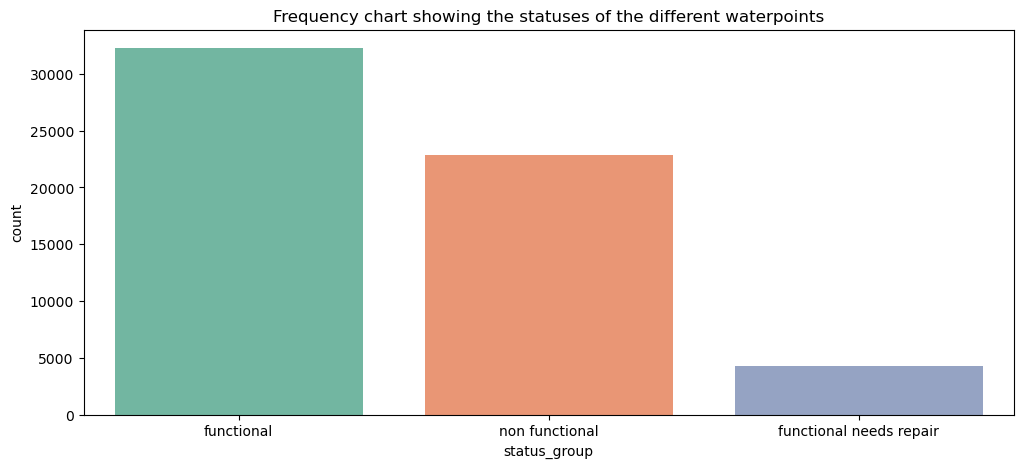

In [28]:
plt.figure(figsize=(12,5))
plt.title("Frequency chart showing the statuses of the different waterpoints")
sns.countplot(data = all_df, x='status_group', palette = "Set2")
all_df['status_group'].value_counts()

counts = all_df['status_group'].value_counts()
Functional = counts['functional']
Repair = counts['functional needs repair']
Shutdown = counts['non functional']
perc_functional = (Functional/(Shutdown+Repair+Functional))*100
perc_repair = (Repair/(Shutdown+Repair+Functional))*100
perc_shutdown = (Shutdown/(Shutdown+Repair+Functional))*100

print(f"There were {Shutdown} non-functional which is {round(perc_shutdown, 2)}%\n")
print(f"There were {Repair}, functional but need repair,  which is {round(perc_repair, 2)}%\n")
print(f"There were {Functional} functional which is {round(perc_functional, 2)}%\n")


From the chart above we can see that the various distribution of the statuses of the waterpoints. We can see also see the amount per status and the percentage split in each and every waterpoint status. As we can see, the number of functional pumps at the waterpoints is more than the non functional and the functional but needs repair category. The functional needs repair category is the least. This means that a pump at a water point is much more likely to non functional incase of a malfunction that it is to keep on working with damage. It could also be as a result of the damages that the waterpoints get are more serious and renders them unable to work.

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

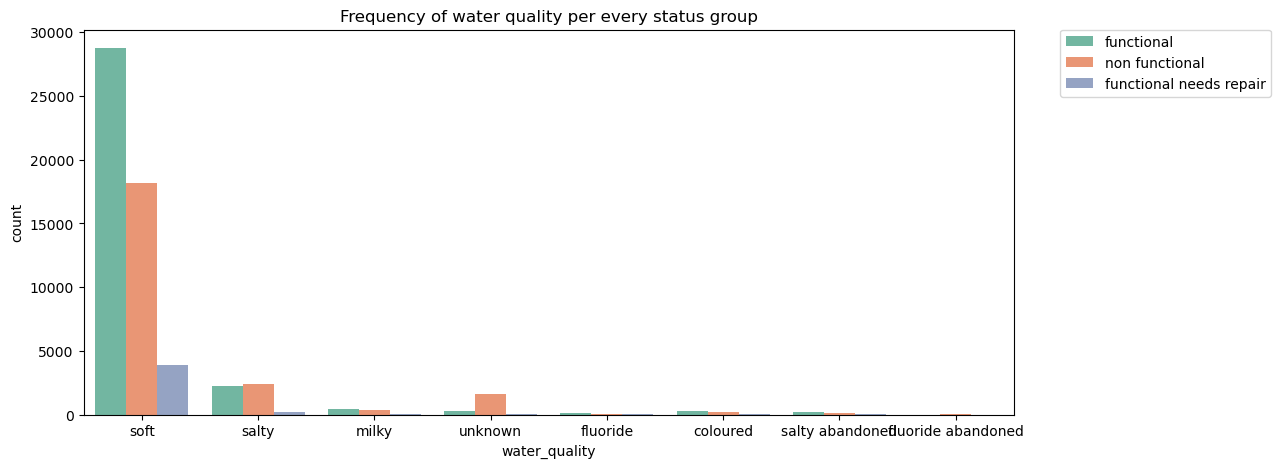

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data=all_df, x='water_quality', hue='status_group', palette="Set2")
plt.title("Frequency of water quality per every status group")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
all_df.water_quality.value_counts()

From the figure above we can see the frequency values of various water quality metrics and the statuses of the pumps. We can see that majority of the pumps operate in areas with soft water, which is the most ideal. In the soft water quality, the pump status category is in line with the frequency distribution plot. This means that functional pumps are the most and functional needs repair are the least.

For salty and unkown water quality conditions however, the number of non functional water pumps however are more. This could either be because of the pumps being unable to handle the nature of water or the nature of water makes the pumps less reliable. One of the main reasons is that salt water is very corrosive and affects the metals in the pumps and the seals. This makes them unreliable or require more maintenance

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

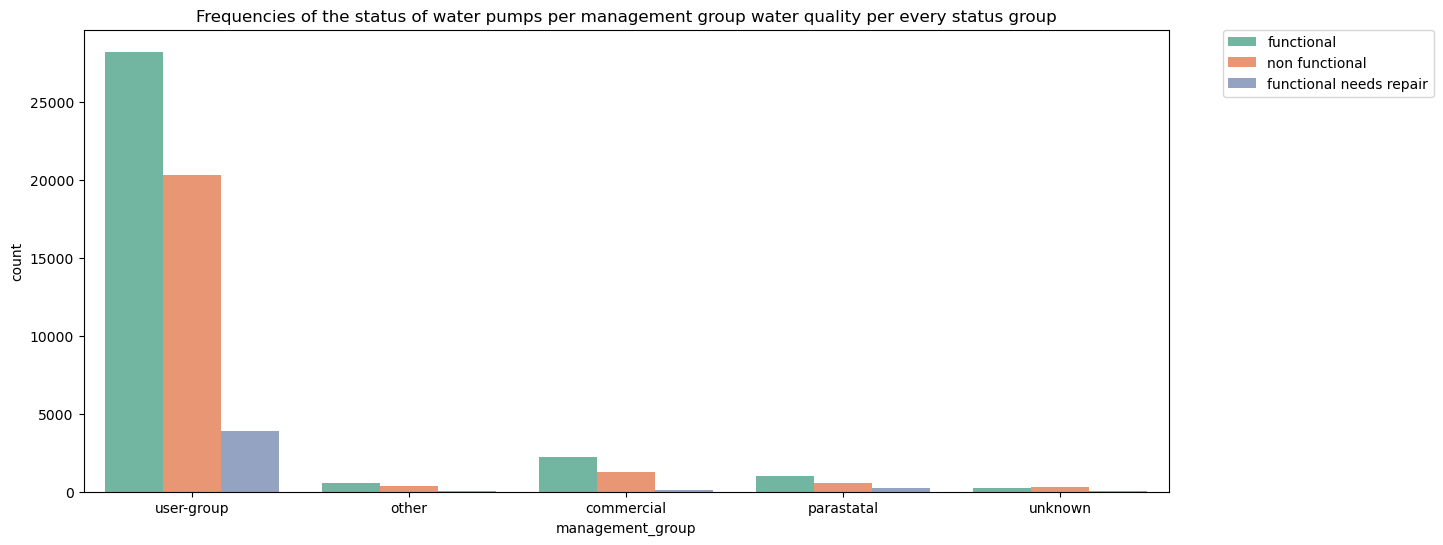

In [30]:
all_df['management_group'].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(data=all_df, x='management_group', hue='status_group', palette="Set2")
plt.title("Frequencies of the status of water pumps per management group water quality per every status group")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
all_df['management_group'].value_counts()

How the pump is managed plays a huge role in how long it is able to function and this inturn affects the populations water accessibility. The figure above gives us a breakdown of various management groups of the pumps and the waterpoint throughout the country. 

From the figure above we can see that the user group management is the most popular. This represents the category of water pumps or water points that are solely managed by the community or the population that is around it and uses it the most. This represents 52490 amount of pumps. The statuses of the pumps and the water points follow the general trend that is experienced throughout the dataset but there is an unusually high number of non-functional water pumps although there are still less than the functional ones. This could point to inneficient management or lack of maintenance by the population or the user-groups incharge of the water pumps.

The next sets of management groups are less compared to the majority user-group. These do no have more than 4,000 water pumps each with 2 having less than 1000 water pumps and waterpoints.

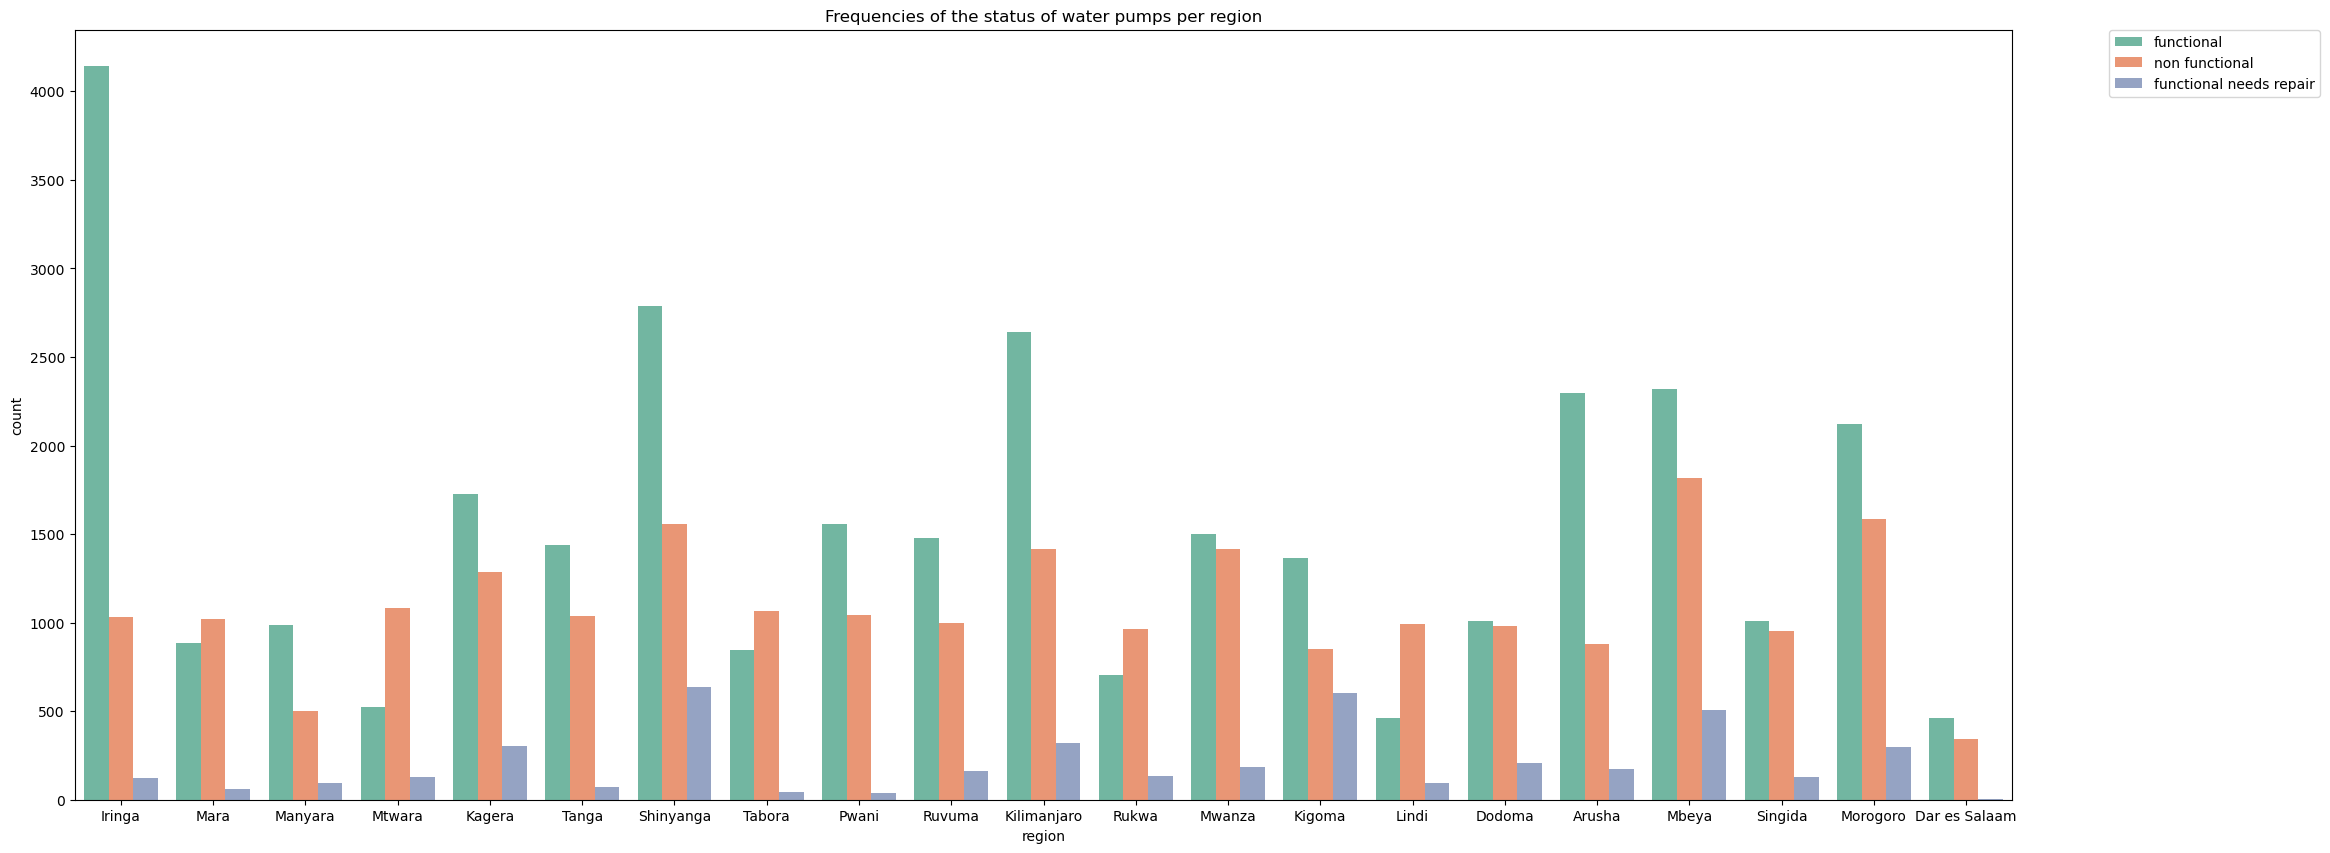

In [31]:
plt.figure(figsize=(25, 10))
sns.countplot(data=all_df,x='region',hue='status_group', palette="Set2")
plt.title("Frequencies of the status of water pumps per region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The figure above shows the frequencies and the statuses of the water pumps in each region in the country. Here we can see the statuses of the various water pumps across the region and this can enable us to see which areas are in dire need of help in fixing the water pumps. This can also tell us which ares may be having water shortages. 

In the regions of Mara, Mtwara, Tabora, Rukwa and Lindi, there may be a water accessibility problem. This is because there are more water pumps and waterpoints that are not functioning as compared to those that are functioning. This means that there may be water scarcity or water may not be easy to find. This means that incase there is going to be a huge initiative to fix the water pumps these areas should be given more priority since there may be a scarcity or difficulty in accessing water.

<Axes: xlabel='waterpoint_type', ylabel='count'>

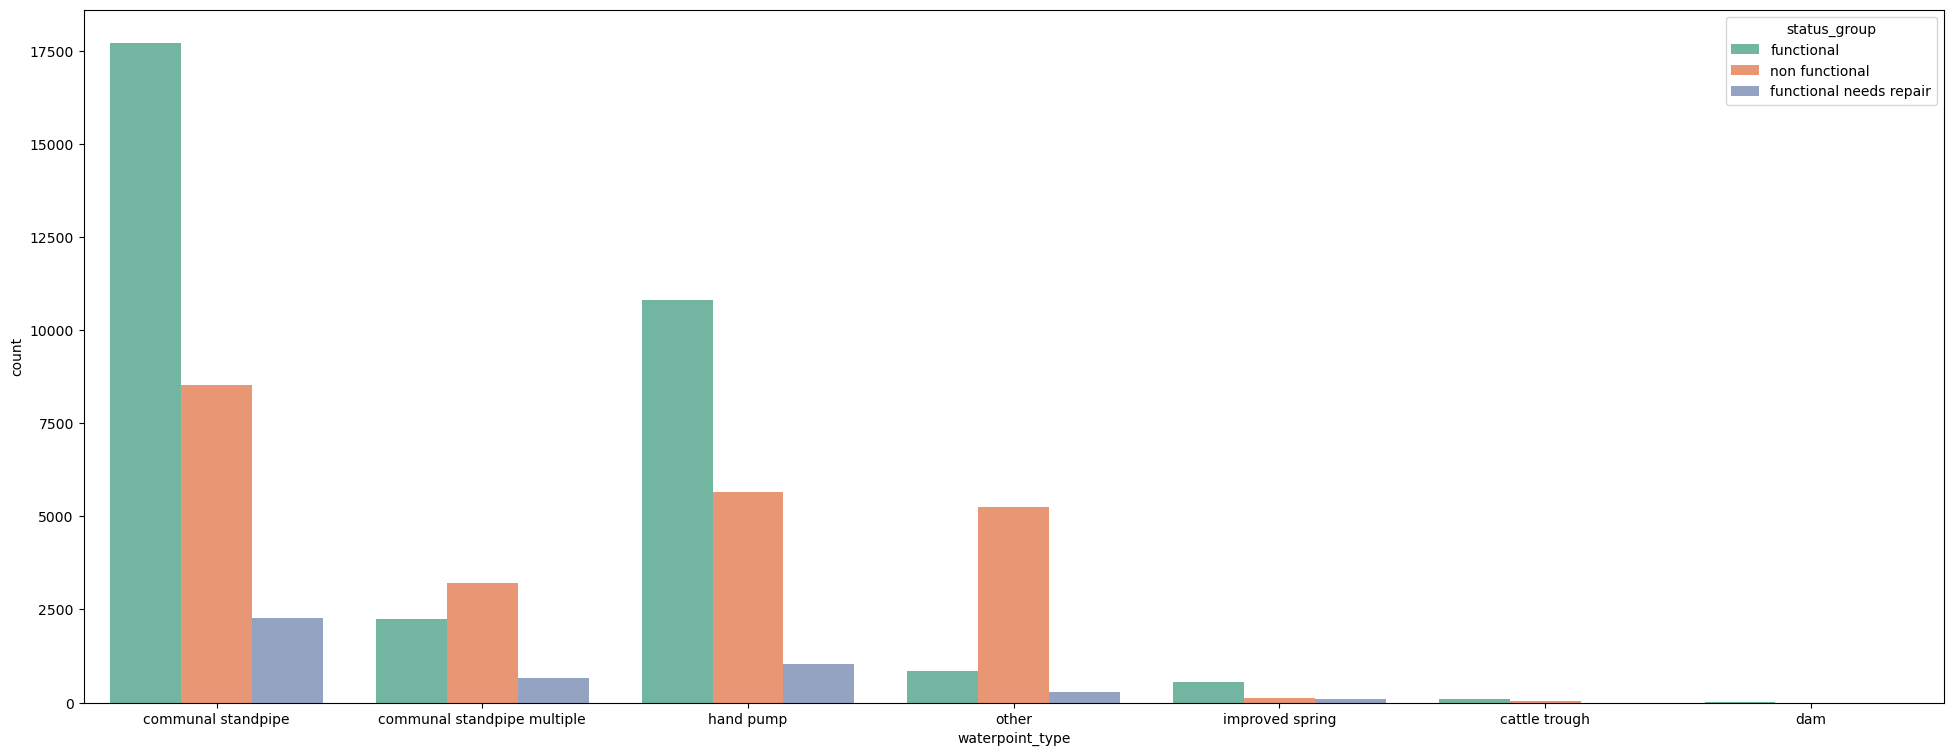

In [32]:
plt.figure(figsize=(24, 9))
sns.countplot(data=all_df,x='waterpoint_type',hue='status_group', palette="Set2")

Text(0.5, 1.0, 'Frequency density distribution of construction year per every status group')

<Figure size 2400x900 with 0 Axes>

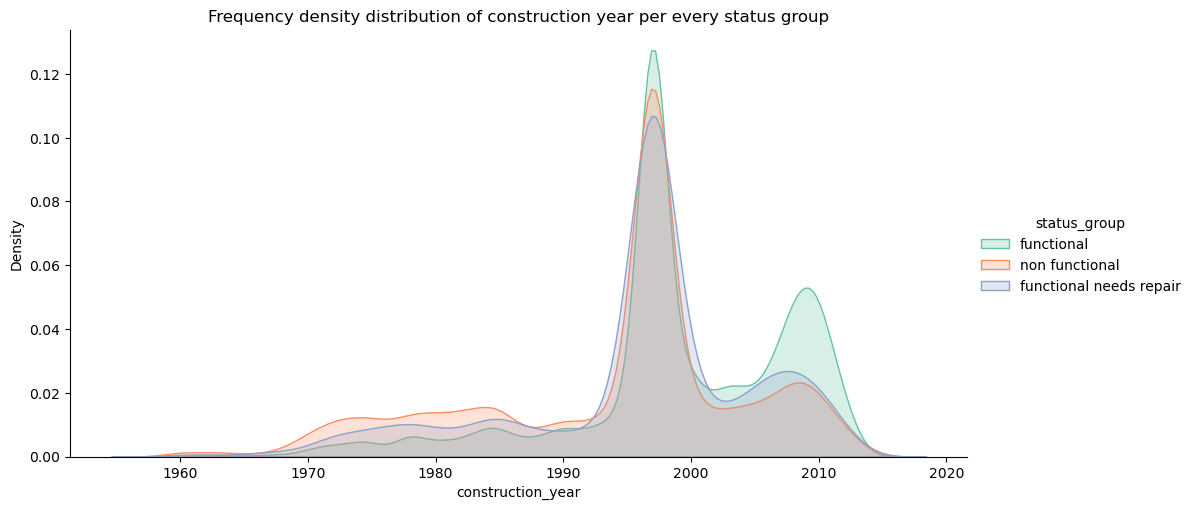

In [33]:
plt.figure(figsize=(24, 9))
sns.FacetGrid(data=all_df, hue='status_group', height=5, aspect=2, palette="Set2").map(sns.kdeplot, 'construction_year', shade=True).add_legend()
plt.title("Frequency density distribution of construction year per every status group")

This figure above how the differnent status groups distribution of construction year 

## Modelling
In this section we are going to prepare the data for modelling, apply some sampling techniques, split the data and use into train machine learning models. We are then going to settle on one machine learning model and tune it so as to give us the best results when it comes to predicting the status of a water well.


### Dealing with high skew in data
In this section we are going to deal with the outliers in the numerical data.

From the cell above we can see the numerical data columns with the high skew both in the positive and negative direction.


In [34]:
#checks the skew of numerical data

numeric_features = ['amount_tsh', 'gps_height', 'longitude', 
       'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'operational_years']

skewed_features = all_df[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
high_skew

num_private          91.931428
amount_tsh           57.806340
population           13.735266
district_code         3.961945
region_code           3.173738
operational_years     0.993849
construction_year    -0.925446
longitude            -4.190941
dtype: float64

In the cell below we use logarithm to return the skew towards normal.

In [35]:
#Replace the high skew data into normal distribution using logarithm
for feature in high_skew.index:
    all_df[feature] = np.log1p(np.abs(all_df[feature]))

all_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,operational_years
0,8.699681,Roman,1390,Roman,3.581798,-9.856322,none,0.0,Lake Nyasa,Mnyusi B,Iringa,2.484907,1.791759,Ludewa,Mundindi,4.700480,True,VWC,False,7.600902,gravity,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2.564949
1,0.000000,Grumeti,1399,GRUMETI,3.575116,-2.147466,Zahanati,0.0,Lake Victoria,Nyamara,Mara,3.044522,1.098612,Serengeti,Natta,5.638355,True,Other,True,7.606387,gravity,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1.386294
2,3.258097,Lottery Club,686,World vision,3.649636,-3.821329,Kwa Mahundi,0.0,Pangani,Majengo,Manyara,3.091042,1.609438,Simanjiro,Ngorika,5.525453,True,VWC,True,7.605890,gravity,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1.609438
3,0.000000,Unicef,263,UNICEF,3.675950,-11.155298,Zahanati Ya Nanyumbu,0.0,Ruvuma / Southern Coast,Mahakamani,Mtwara,4.510860,4.158883,Nanyumbu,Nanyumbu,4.077537,True,VWC,True,7.594381,submersible,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,3.332205
4,0.000000,Action In A,0,Artisan,3.469817,-1.825359,Shuleni,0.0,Lake Victoria,Kyanyamisa,Kagera,2.944439,0.693147,Karagwe,Nyakasimbi,5.641907,True,other,True,7.599902,gravity,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2.708050


### Conversion of categorical data
In this section we are going to come up with effective ways to convert the categorical data that is in object data type as well as our target variable which is the status_group column

In the cell above, the target column is converted into numerical data type. This is done by assigning each category a unique numerical identifier.In this case the non functional is 0, functional needs repair is 1 and the functional is 2

We can see the transformation below

In [36]:
all_df.status_group = pd.Categorical(all_df.status_group, ['non functional', 'functional needs repair', 'functional'])
all_df.status_group = all_df.status_group.cat.codes
all_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,operational_years
0,8.699681,Roman,1390,Roman,3.581798,-9.856322,none,0.0,Lake Nyasa,Mnyusi B,Iringa,2.484907,1.791759,Ludewa,Mundindi,4.700480,True,VWC,False,7.600902,gravity,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2,2.564949
1,0.000000,Grumeti,1399,GRUMETI,3.575116,-2.147466,Zahanati,0.0,Lake Victoria,Nyamara,Mara,3.044522,1.098612,Serengeti,Natta,5.638355,True,Other,True,7.606387,gravity,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2,1.386294
2,3.258097,Lottery Club,686,World vision,3.649636,-3.821329,Kwa Mahundi,0.0,Pangani,Majengo,Manyara,3.091042,1.609438,Simanjiro,Ngorika,5.525453,True,VWC,True,7.605890,gravity,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2,1.609438
3,0.000000,Unicef,263,UNICEF,3.675950,-11.155298,Zahanati Ya Nanyumbu,0.0,Ruvuma / Southern Coast,Mahakamani,Mtwara,4.510860,4.158883,Nanyumbu,Nanyumbu,4.077537,True,VWC,True,7.594381,submersible,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,3.332205
4,0.000000,Action In A,0,Artisan,3.469817,-1.825359,Shuleni,0.0,Lake Victoria,Kyanyamisa,Kagera,2.944439,0.693147,Karagwe,Nyakasimbi,5.641907,True,other,True,7.599902,gravity,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2,2.708050


The cell below converts the boolean and object data types into categories and takes the various categorical codes.

In [37]:
#gets object data column names
objects_dtype = all_df.dtypes[all_df.dtypes == 'object'].index.tolist() 

#gets bool data column names
bool_dtype = all_df.dtypes[all_df.dtypes == 'bool'].index.tolist()

#convets object data columns to numeric data
for category in objects_dtype:
    all_df[category] = all_df[category].astype('category').cat.codes

#converts boolean data columns to numeric data
for category in bool_dtype:
    all_df[category] = all_df[category].astype('category').cat.codes


all_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,operational_years
0,8.699681,1368,1390,1518,3.581798,-9.856322,37398,0.0,1,11807,3,2.484907,1.791759,51,1426,4.700480,1,6,0,7.600902,3,1,0,7,4,2,6,1,8,6,0,1,1,2,2.564949
1,0.000000,469,1399,545,3.575116,-2.147466,37194,0.0,4,15838,9,3.044522,1.098612,103,1576,5.638355,1,1,1,7.606387,3,1,0,11,4,0,6,2,5,3,1,1,1,2,1.386294
2,3.258097,825,686,2048,3.649636,-3.821329,14572,0.0,5,9074,8,3.091042,1.609438,108,1624,5.525453,1,6,1,7.605890,3,1,0,7,4,4,6,1,0,1,1,2,1,2,1.609438
3,0.000000,1740,263,1852,3.675950,-11.155298,37284,0.0,7,8982,12,4.510860,4.158883,87,1571,4.077537,1,6,1,7.594381,14,10,5,7,4,0,6,0,3,0,0,2,1,0,3.332205
4,0.000000,20,0,119,3.469817,-1.825359,35528,0.0,4,7698,4,2.944439,0.693147,26,1687,5.641907,1,11,1,7.599902,3,1,0,1,1,0,6,3,5,3,1,1,1,2,2.708050


### Selecting the target and feature variables

In [38]:
X = all_df[all_df.columns.difference(['status_group'])]
y = all_df['status_group']

### Carrying out Synthetic Minority Oversampling
This ensures that the data that is going to be split has its classes balanced out.


In [41]:
#initializes and fits SMOTE
counter = Counter(y)
print(counter)
smt = SMOTE(random_state=0)
X, y = smt.fit_resample(X, y) 

Counter({2: 32259, 0: 22824, 1: 4317})


Class balances before SMOTE above

In [42]:
counter = Counter(y)
print(counter)

Counter({2: 32259, 0: 32259, 1: 32259})


Class balance after SMOTE as seen above

In [43]:
#Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)